In [24]:
import pandas as pd
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [25]:
start_date = "2012-01-01"
end_date = "2023-04-30"

In [26]:
tickers = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "BHARTIARTL.NS", "ICICIBANK.NS",
          "SBIN.NS", "INFY.NS", "ITC.NS", "ADANIENT.NS", "TATAMOTORS.NS" , "^NSEI"]

df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)["Adj Close"]
    df[ticker] = data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [27]:
df=df.dropna()
df

RELIANCE.NS       TCS.NS  HDFCBANK.NS  BHARTIARTL.NS  \
Date                                                               
2012-01-03   301.701965   468.053009   198.179688     303.745239   
2012-01-04   298.163086   458.438568   200.052475     293.328247   
2012-01-05   291.230988   458.047607   200.210434     291.676727   
2012-01-06   298.745972   457.031738   204.565323     279.946960   
2012-01-09   294.041290   457.793640   205.648407     271.393280   
...                 ...          ...          ...            ...   
2023-04-24  2168.772217  3098.099854  1646.525879     756.773804   
2023-04-25  2185.373535  3099.270996  1623.117676     769.067322   
2023-04-26  2172.543213  3120.885498  1630.579102     769.913452   
2023-04-27  2186.293457  3110.932129  1639.552246     782.903748   
2023-04-28  2226.256592  3141.476074  1645.989380     795.645203   

            ICICIBANK.NS     SBIN.NS      INFY.NS      ITC.NS  ADANIENT.NS  \
Date                                                                         
2012-01-03    114.962265  147.209091   272.576904   95.913109    37.192513   
2012-01-04    117.702477  146.380508   271.634766   95.530151    36.001728   
2012-01-05    118.494453  146.069824   270.278717   95.649826    34.571503   
2012-01-06    119.064674  144.369583   269.517487   96.750900    34.759171   
2012-01-09    118.446938  141.305679   269.936188   96.703026    34.662102   
...                  ...         ...          ...         ...          ...   
2023-04-24    897.363525  535.055420  1187.879150  393.341370  1801.050171   
2023-04-25    905.992493  542.001709  1186.523071  396.084259  1843.678833   
2023-04-26    907.480286  546.391357  1189.089966  396.757965  1846.977295   
2023-04-27    910.852478  544.847778  1207.204102  400.367004  1852.124756   
2023-04-28    910.158203  557.920227  1213.500488  409.558167  1923.988647   

            TATAMOTORS.NS         ^NSEI  
Date                                     
2012-01-03     185.196640   4765.299805  
2012-01-04     192.119446   4749.649902  
2012-01-05     192.978806   4749.950195  
2012-01-06     194.411118   4754.100098  
2012-01-09     191.546524   4742.799805  
...                   ...           ...  
2023-04-24     472.266174  17743.400391  
2023-04-25     470.626343  17769.250000  
2023-04-26     475.247650  17813.599609  
2023-04-27     478.626678  17915.050781  
2023-04-28     481.955994  18065.000000  

[2776 rows x 11 columns]

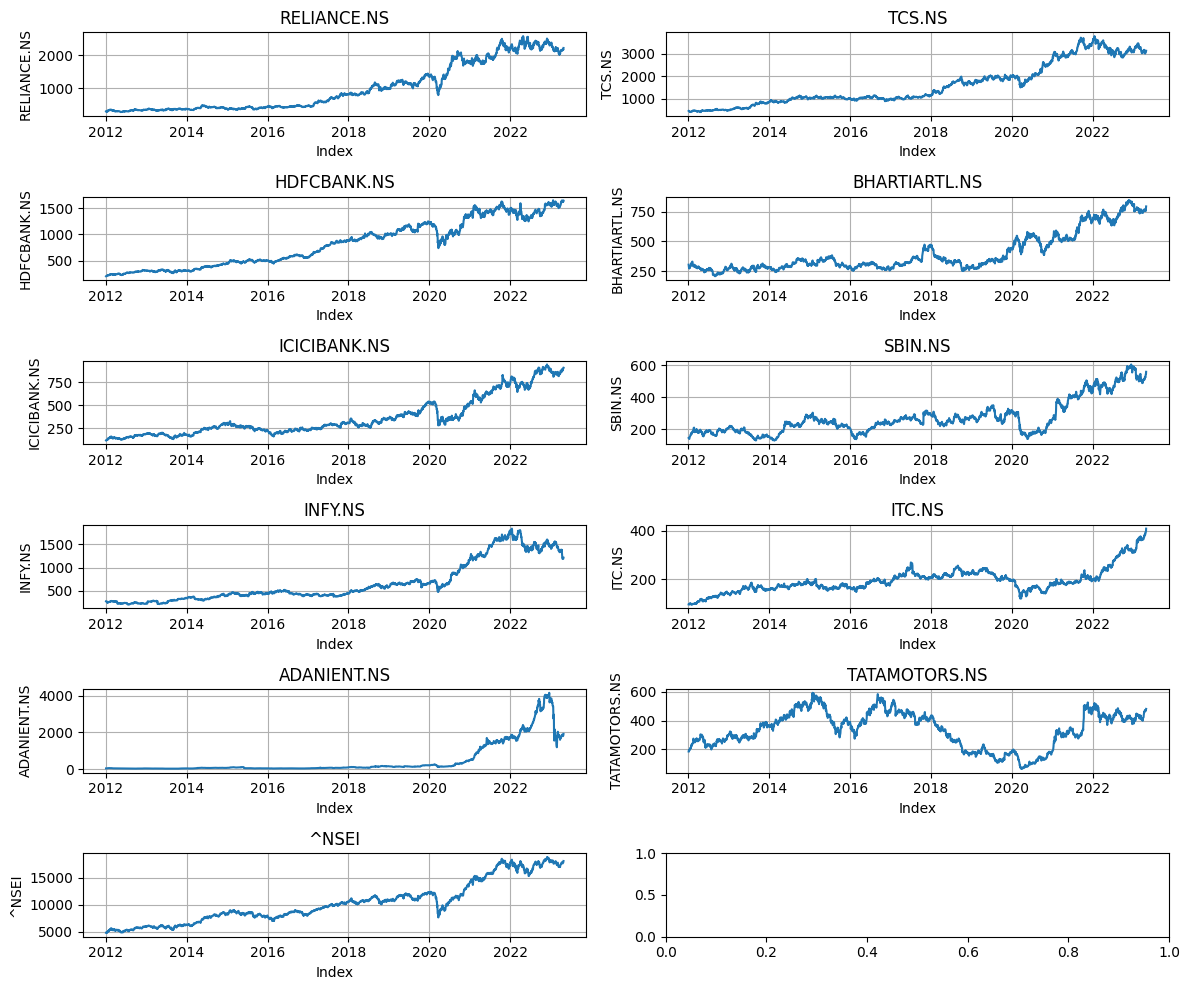

In [28]:
fig, axes = plt.subplots(6, 2, figsize=(12, 10))

for i, col in enumerate(df.columns):
    row, col_idx = divmod(i, 2)
    axes[row, col_idx].plot(df.index, df[col], label=col)
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].set_xlabel('Index')
    axes[row, col_idx].set_ylabel(col)
    axes[row, col_idx].grid(True)

plt.tight_layout()
plt.show()


In [29]:
def normalize(df):
    df_normalized = df.copy()

    for column in df.columns:
        df_normalized[column] = df_normalized[column] / df_normalized[column].iloc[0] * 100

    return df_normalized

In [30]:
def calculate_daily_return(df):
    df_daily_return = df.copy()

    for column in df.columns:
        df_daily_return[column] = (df_daily_return[column] / df_daily_return[column].shift(1) - 1) * 100
        df_daily_return = df_daily_return.fillna(0)

    return df_daily_return

In [31]:
stocks_daily_return = calculate_daily_return(df)
stocks_daily_return

RELIANCE.NS    TCS.NS  HDFCBANK.NS  BHARTIARTL.NS  ICICIBANK.NS  \
Date                                                                          
2012-01-03     0.000000  0.000000     0.000000       0.000000      0.000000   
2012-01-04    -1.172972 -2.054135     0.944995      -3.429516      2.383575   
2012-01-05    -2.324935 -0.085281     0.078959      -0.563028      0.672863   
2012-01-06     2.580421 -0.221782     2.175156      -4.021496      0.481222   
2012-01-09    -1.574810  0.166707     0.529456      -3.055465     -0.518825   
...                 ...       ...          ...            ...           ...   
2023-04-24     0.383145  0.441331     0.809143      -0.646890      2.156604   
2023-04-25     0.765471  0.037802    -1.421672       1.624464      0.961591   
2023-04-26    -0.587100  0.697406     0.459697       0.110020      0.164217   
2023-04-27     0.632910 -0.318928     0.550304       1.687241      0.371600   
2023-04-28     1.827894  0.981826     0.392615       1.627461     -0.076223   

             SBIN.NS   INFY.NS    ITC.NS  ADANIENT.NS  TATAMOTORS.NS     ^NSEI  
Date                                                                            
2012-01-03  0.000000  0.000000  0.000000     0.000000       0.000000  0.000000  
2012-01-04 -0.562861 -0.345641 -0.399275    -3.201678       3.738084 -0.328414  
2012-01-05 -0.212244 -0.499218  0.125274    -3.972658       0.447305  0.006322  
2012-01-06 -1.163992 -0.281646  1.151151     0.542840       0.742212  0.087367  
2012-01-09 -2.122264  0.155352 -0.049482    -0.279261      -1.473472 -0.237696  
...              ...       ...       ...          ...            ...       ...  
2023-04-24  2.108065 -0.085549  0.110231    -0.058234       0.848898  0.677197  
2023-04-25  1.298237 -0.114160  0.697331     2.366878      -0.347226  0.145686  
2023-04-26  0.809896  0.216338  0.170092     0.178907       0.981948  0.249586  
2023-04-27 -0.282504  1.523361  0.909632     0.278696       0.711004  0.569515  
2023-04-28  2.399285  0.521568  2.295684     3.880078       0.695597  0.837001  

[2776 rows x 11 columns]

In [32]:
def compute_alpha_beta(stocks_daily_return):
    beta = {}
    alpha = {}

    stock_columns = [col for col in stocks_daily_return.columns if col not in ['^NSEI']]

    for stock in stock_columns:
        stocks_daily_return.plot(kind='scatter', x='^NSEI', y=stock)
        b, a = np.polyfit(stocks_daily_return['^NSEI'], stocks_daily_return[stock], 1)
        plt.plot(stocks_daily_return['^NSEI'], b * stocks_daily_return['^NSEI'] + a, '-', color='r')

        beta[stock] = b
        alpha[stock] = a

        plt.show()

    return beta, alpha

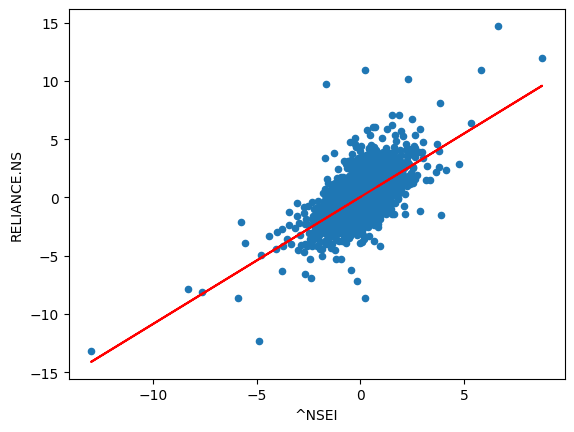

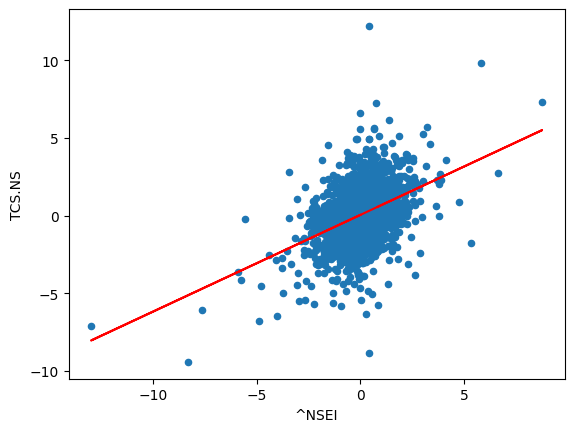

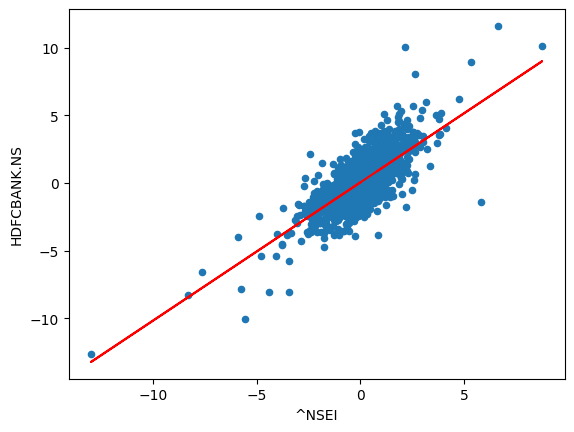

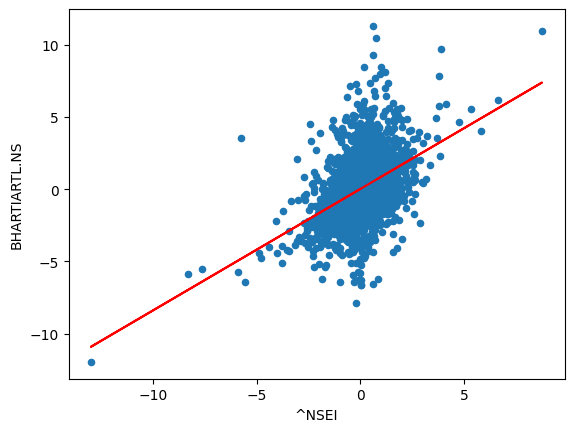

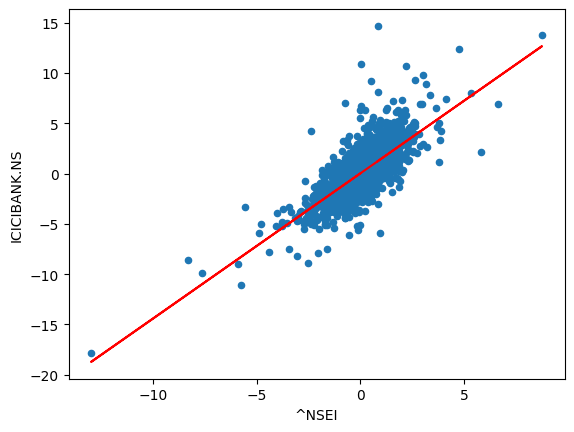

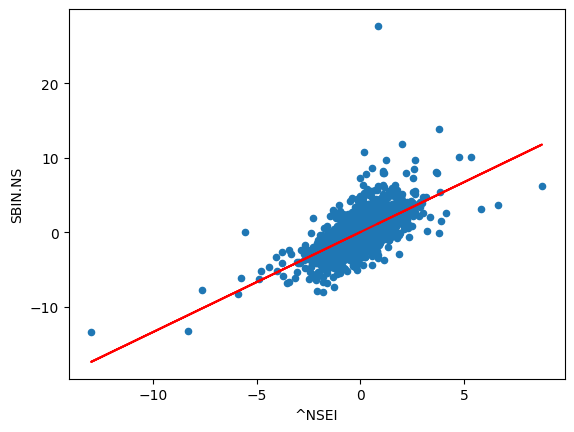

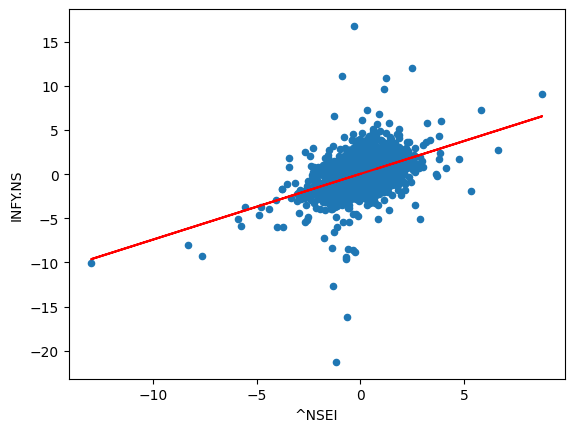

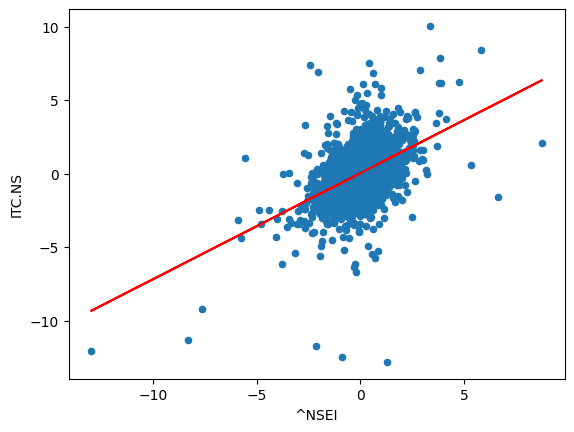

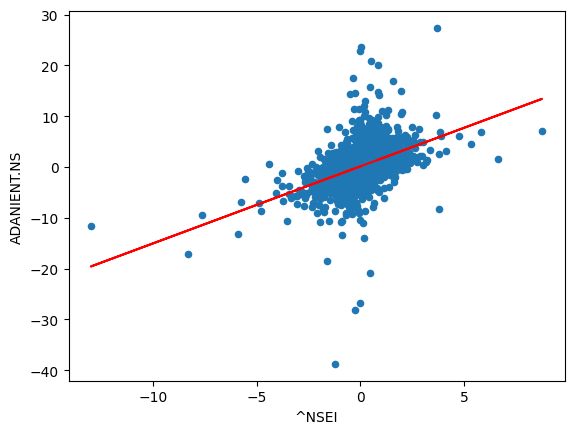

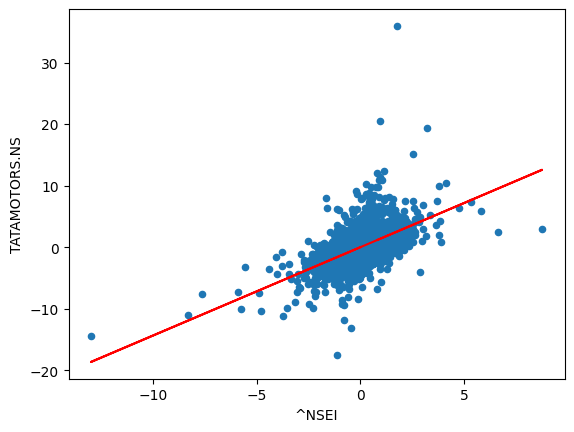

In [33]:
beta_values, alpha_values = compute_alpha_beta(stocks_daily_return)

In [34]:
alpha_values

{'RELIANCE.NS': 0.029201556402809,
 'TCS.NS': 0.04724880335230663,
 'HDFCBANK.NS': 0.03222346575409625,
 'BHARTIARTL.NS': 0.00942913998963867,
 'ICICIBANK.NS': 0.018626504591653967,
 'SBIN.NS': -0.0007984033286006452,
 'INFY.NS': 0.029602279973649757,
 'ITC.NS': 0.026637857868364607,
 'ADANIENT.NS': 0.12060962017633985,
 'TATAMOTORS.NS': -0.006973854612213078}

In [35]:
beta_values

{'RELIANCE.NS': 1.0898428612337592,
 'TCS.NS': 0.6223913423419138,
 'HDFCBANK.NS': 1.0214903873204706,
 'BHARTIARTL.NS': 0.8404303461996288,
 'ICICIBANK.NS': 1.4440827404937944,
 'SBIN.NS': 1.342126413985992,
 'INFY.NS': 0.7441690923587704,
 'ITC.NS': 0.7217739023068862,
 'ADANIENT.NS': 1.5163899122007696,
 'TATAMOTORS.NS': 1.4351362724766639}

In [36]:
def compute_expected_returns(beta, stocks_daily_return, portfolio_weights):
    stock_symbols = list(beta.keys())
    expected_returns = {}
    risk_free_rate = 7
    market_return = stocks_daily_return['^NSEI'].mean() * 252

    for symbol in stock_symbols:
        expected_returns[symbol] = risk_free_rate + beta[symbol] * (market_return - risk_free_rate)
        print(f'Expected Return Based on CAPM for {symbol} is {expected_returns[symbol]}%')

    print()
    print()
    portfolio_return = np.sum(np.array(list(expected_returns.values())) * portfolio_weights)
    print(f'Expected Return Based on CAPM for the portfolio is {portfolio_return}%')

    return expected_returns, portfolio_return

In [37]:
portfolio_weights = np.full((10,), 1/10)
expected_returns, portfolio_return = compute_expected_returns(beta_values, stocks_daily_return, portfolio_weights)

Expected Return Based on CAPM for RELIANCE.NS is 14.128324780752147%
Expected Return Based on CAPM for TCS.NS is 11.070869101183069%
Expected Return Based on CAPM for HDFCBANK.NS is 13.681252408254124%
Expected Return Based on CAPM for BHARTIARTL.NS is 12.496994728697816%
Expected Return Based on CAPM for ICICIBANK.NS is 16.44529817157784%
Expected Return Based on CAPM for SBIN.NS is 15.778433401754716%
Expected Return Based on CAPM for INFY.NS is 11.867379666207732%
Expected Return Based on CAPM for ITC.NS is 11.720899660791375%
Expected Return Based on CAPM for ADANIENT.NS is 16.918236998117877%
Expected Return Based on CAPM for TATAMOTORS.NS is 16.38678209376959%


Expected Return Based on CAPM for the portfolio is 14.04944710111063%


In [38]:
def interactive_plot(df, title):
    fig = px.line(title=title)

    for column in df.columns:
        fig.add_scatter(x=df.index,y=df[column], name=column)

    fig.show()

In [39]:
interactive_plot(df, 'Prices')

In [40]:
interactive_plot(normalize(df), 'Normalized Prices')

In [41]:
stocks_daily_return.mean()

RELIANCE.NS      0.087762
TCS.NS           0.080692
HDFCBANK.NS      0.087111
BHARTIARTL.NS    0.054588
ICICIBANK.NS     0.096221
SBIN.NS          0.071318
INFY.NS          0.069589
ITC.NS           0.065421
ADANIENT.NS      0.202090
TATAMOTORS.NS    0.070140
^NSEI            0.053733
dtype: float64

In [42]:
def interactive_beta_plot(df):
    for column in df.columns:
        if column != '^NSEI':
            fig = px.scatter(df, x='^NSEI', y=column, title=column)
            beta, alpha = np.polyfit(df['^NSEI'], df[column], 1)
            fig.add_scatter(x=df['^NSEI'], y=beta*df['^NSEI'] + alpha, mode='lines')
            fig.show()
     

In [43]:
interactive_beta_plot(stocks_daily_return)